아래와 같이 5와 사칙연산만으로 12를 표현할 수 있습니다.

12 = 5 + 5 + (5 / 5) + (5 / 5)
12 = 55 / 5 + 5 / 5
12 = (55 + 5) / 5

5를 사용한 횟수는 각각 6,5,4 입니다. 그리고 이중 가장 작은 경우는 4입니다.
이처럼 숫자 N과 number가 주어질 때, N과 사칙연산만 사용해서 표현 할 수 있는 방법 중 N 사용횟수의 최솟값을 return 하도록 solution 함수를 작성하세요.

제한사항
N은 1 이상 9 이하입니다.
number는 1 이상 32,000 이하입니다.
수식에는 괄호와 사칙연산만 가능하며 나누기 연산에서 나머지는 무시합니다.
최솟값이 8보다 크면 -1을 return 합니다.
입출력 예
N	number	return
5	12	4
2	11	3
입출력 예 설명
예제 #1
문제에 나온 예와 같습니다.

예제 #2
11 = 22 / 2와 같이 2를 3번만 사용하여 표현할 수 있습니다.

In [ ]:
from array import *
from collections import *
from math import *

N 하나를 더 소모하여 +1, -1, +N, -N
두개를 소모하여 +11, -11 할 수 있음

1 = N/N
11 = NN/N
111 = NNN/N
122 = (NNN+NN)/N
1111 = NNNN/N
11111 = NNNNN/N
N
N*11
N * N
N*111
N * N * N
N*1111
N * N * N * N


In [ ]:
import re

def solution(N, number):

    library = {
        N:  "N",
        N*11:"NN",
        N*111:"NNN",
        N*1111:"NNNN",
        N*11111:"NNNNN",
        N**2:"N*N",
        N**3:"N*N*N",
        N**4:"N*N*N*N",
        N**5:"N*N*N*N*N",
        N**6:"N*N*N*N*N*N",
        N**7:"N*N*N*N*N*N*N",
        N**8:"N*N*N*N*N*N*N*N",
        1: "N/N",
        11: "NN/N",
        111: "NNN/N",
        1111: "NNNN/N",
        11111: "NNNNN/N",
        111111: "NNNNNN/N",
    }

    def add(a,b):
        la = library[a]
        lb = library[b]
        new_code = la +" + "+ lb

        return new_code

    answer = 0
    return answer


In [ ]:
def solution(N, number):
    if N == number: return 1
    dp = [set() for _ in range(9)]
    for k in range(1, 9):
        # 1) 자리붙이기 (예: 5, 55, 555)
        concat = int(str(N) * k)
        dp[k].add(concat)
        if concat == number: return k

        # 2) 분할 결합
        for i in range(1, k):
            j = k - i
            for a in dp[i]:
                for b in dp[j]:
                    dp[k].add(a + b)
                    dp[k].add(a - b)
                    dp[k].add(a * b)
                    if b != 0:
                        dp[k].add(int(a / b))  # 0쪽으로 절삭

        if number in dp[k]:
            return k
        # 가벼운 가지치기(연산 부담 감소): 범위를 과도하게 벗어나는 값 제거
        # (문제 범위상 32000이면 2배 정도만 유지)
        pruned = set()
        for x in dp[k]:
            if -64000 <= x <= 64000:
                pruned.add(x)
        dp[k] = pruned

    return -1


In [23]:
def solution(N, number, do_print=True):
    # 바로 일치
    if N == number:
        return 1, str(N)

    # dp[k]: N을 k번 써서 만들 수 있는 값 -> 대표식 문자열
    dp = [dict() for _ in range(9)]

    def put(dic, v, e):
        # 값 범위 가지치기(폭발 방지)
        if v < -64000 or v > 64000:
            return
        # 동일 값이면 더 짧은 식을 유지(간단한 휴리스틱)
        if (v not in dic) or (len(e) < len(dic[v])):
            dic[v] = e

    for k in range(1, 9):
        # 1) 자리붙이기
        concat_val = int(str(N) * k)
        dp[k][concat_val] = str(concat_val)
        if concat_val == number:
            if do_print:
                print(str(concat_val))
            return k

        # 2) 분할 결합
        cur = dict(dp[k])  # 자리붙이기 결과 포함
        for i in range(1, k):
            j = k - i
            A, B = dp[i], dp[j]
            if not A or not B:
                continue
            for a_val, a_exp in A.items():
                for b_val, b_exp in B.items():
                    put(cur, a_val + b_val, f"({a_exp}+{b_exp})")
                    put(cur, a_val - b_val, f"({a_exp}-{b_exp})")
                    put(cur, b_val - a_val, f"({b_exp}-{a_exp})")
                    put(cur, a_val * b_val, f"({a_exp}*{b_exp})")
                    if b_val != 0:
                        put(cur, int(a_val / b_val), f"({a_exp}/{b_exp})")
                    if a_val != 0:
                        put(cur, int(b_val / a_val), f"({b_exp}/{a_exp})")

        dp[k] = cur
        if number in dp[k]:
            if do_print:
                print(dp[k][number])
            return k
    return -1


In [ ]:
data = [
    (5,12,4),
    (2,11,3),
    (1,111,3),
    (9,122,6),
    (4,99,7)
]

# 11111 - 9999 = 1112

# 99999-9999-9/9

# 4444-444-4/4

# 99

# 444-44-4/4

In [26]:
score = 0
for row in data:
    result = solution(*row[:-1])
    print(f"{row}  :  {result}")
    if result == row[-1]:
        print("CORRECT!")
        score +=1
    else:
        print("WRONG")
    print()
print("-"*30)
print(f"TOTAL SCORE : {score}/{len(data)}")



((5+55)/5)
(5, 12, 4)  :  4
CORRECT!

(22/2)
(2, 11, 3)  :  3
CORRECT!

111
(1, 111, 3)  :  3
CORRECT!

((99+999)/9)
(9, 122, 6)  :  6
CORRECT!

(((444-44)-4)/4)
(4, 99, 7)  :  7
CORRECT!

------------------------------
TOTAL SCORE : 5/5


수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다.

마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return 하도록 solution 함수를 작성해주세요.

제한사항
마라톤 경기에 참여한 선수의 수는 1명 이상 100,000명 이하입니다.
completion의 길이는 participant의 길이보다 1 작습니다.
참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
참가자 중에는 동명이인이 있을 수 있습니다.
입출력 예
participant	completion	return
["leo", "kiki", "eden"]	["eden", "kiki"]	"leo"
["marina", "josipa", "nikola", "vinko", "filipa"]	["josipa", "filipa", "marina", "nikola"]	"vinko"
["mislav", "stanko", "mislav", "ana"]	["stanko", "ana", "mislav"]	"mislav"
입출력 예 설명
예제 #1
"leo"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

예제 #2
"vinko"는 참여자 명단에는 있지만, 완주자 명단에는 없기 때문에 완주하지 못했습니다.

예제 #3
"mislav"는 참여자 명단에는 두 명이 있지만, 완주자 명단에는 한 명밖에 없기 때문에 한명은 완주하지 못했습니다.

In [ ]:
# Hash -> 이게 더 빠름

def solution(participant, completion)-> str:
    table = {}
    for x in participant:
        table[x] = table.get(x,0) + 1
    for y in completion:
        table[y] -= 1

    for k, v in table.items():
        if v > 0:
            return k


In [ ]:
# str을 알파벳으로 sort후 비교
# zip은 시간 안걸림

def solution(participant, completion)-> str:
    participant.sort()
    completion.sort()
    last = participant.pop()
    for p,c in zip(participant,completion):
        if p !=c:
            return p
    return last

In [ ]:
# Hash 2 -> 이게 약간 더 느림
def solution(participant, completion) -> str:
    d = {}
    for x in participant:
        d[x] = d.get(x, 0) + 1
    for x in completion:
        cnt = d[x] - 1
        if cnt: d[x] = cnt
        else: del d[x]
    # 한 명만 남는 것이 보장됨
    return next(iter(d))

배열 arr가 주어집니다. 배열 arr의 각 원소는 숫자 0부터 9까지로 이루어져 있습니다. 이때, 배열 arr에서 연속적으로 나타나는 숫자는 하나만 남기고 전부 제거하려고 합니다. 단, 제거된 후 남은 수들을 반환할 때는 배열 arr의 원소들의 순서를 유지해야 합니다. 예를 들면,

arr = [1, 1, 3, 3, 0, 1, 1] 이면 [1, 3, 0, 1] 을 return 합니다.
arr = [4, 4, 4, 3, 3] 이면 [4, 3] 을 return 합니다.
배열 arr에서 연속적으로 나타나는 숫자는 제거하고 남은 수들을 return 하는 solution 함수를 완성해 주세요.

제한사항
배열 arr의 크기 : 1,000,000 이하의 자연수
배열 arr의 원소의 크기 : 0보다 크거나 같고 9보다 작거나 같은 정수
입출력 예
arr	answer
[1,1,3,3,0,1,1]	[1,3,0,1]
[4,4,4,3,3]	[4,3]
입출력 예 설명
입출력 예 #1,2
문제의 예시와 같습니다.

In [ ]:
def solution(arr):
    temp = arr[0]
    answer = [temp]
    for n in arr:
        if temp != n:
            temp = n
            answer.append(temp)
    return answer

프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return 하도록 solution 함수를 완성하세요.

제한 사항
작업의 개수(progresses, speeds배열의 길이)는 100개 이하입니다.
작업 진도는 100 미만의 자연수입니다.
작업 속도는 100 이하의 자연수입니다.
배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.
입출력 예
progresses	speeds	return
[93, 30, 55]	[1, 30, 5]	[2, 1]
[95, 90, 99, 99, 80, 99]	[1, 1, 1, 1, 1, 1]	[1, 3, 2]
입출력 예 설명
입출력 예 #1
첫 번째 기능은 93% 완료되어 있고 하루에 1%씩 작업이 가능하므로 7일간 작업 후 배포가 가능합니다.
두 번째 기능은 30%가 완료되어 있고 하루에 30%씩 작업이 가능하므로 3일간 작업 후 배포가 가능합니다. 하지만 이전 첫 번째 기능이 아직 완성된 상태가 아니기 때문에 첫 번째 기능이 배포되는 7일째 배포됩니다.
세 번째 기능은 55%가 완료되어 있고 하루에 5%씩 작업이 가능하므로 9일간 작업 후 배포가 가능합니다.

따라서 7일째에 2개의 기능, 9일째에 1개의 기능이 배포됩니다.

입출력 예 #2
모든 기능이 하루에 1%씩 작업이 가능하므로, 작업이 끝나기까지 남은 일수는 각각 5일, 10일, 1일, 1일, 20일, 1일입니다. 어떤 기능이 먼저 완성되었더라도 앞에 있는 모든 기능이 완성되지 않으면 배포가 불가능합니다.

따라서 5일째에 1개의 기능, 10일째에 3개의 기능, 20일째에 2개의 기능이 배포됩니다.

In [5]:
def solution(progresses, speeds):
    rest_days = []
    for p, s in zip(progresses, speeds):
        # 올림 (양수 전용)
        q = 100-p
        rest_days.append((q+s-1)//s)
        # -((-a) // b) 도 됨. 음수 가능
    print(rest_days)

    result = []
    temp = rest_days[0]
    count = 0
    for r in rest_days:
        if r <= temp:
            count += 1
        else:
            result.append(count)
            count = 1
            temp = r
    result.append(count)
    return result

In [7]:
# Deque

from collections import deque

def solution(progresses, speeds):
    q = deque()
    for p, s in zip(progresses, speeds):
        # 남은 기간(올림)
        q.append((100 - p + s - 1) // s)

    result = []
    while q:
        # 맨 앞 작업의 완료일
        day = q.popleft()
        count = 1
        # 앞 작업이 끝난 날(day)보다 빨리 끝난 것들 같이 배포
        while q and q[0] <= day:
            q.popleft()
            count += 1
        result.append(count)

    return result


매운 것을 좋아하는 Leo는 모든 음식의 스코빌 지수를 K 이상으로 만들고 싶습니다. 모든 음식의 스코빌 지수를 K 이상으로 만들기 위해 Leo는 스코빌 지수가 가장 낮은 두 개의 음식을 아래와 같이 특별한 방법으로 섞어 새로운 음식을 만듭니다.

섞은 음식의 스코빌 지수 = 가장 맵지 않은 음식의 스코빌 지수 + (두 번째로 맵지 않은 음식의 스코빌 지수 * 2)
Leo는 모든 음식의 스코빌 지수가 K 이상이 될 때까지 반복하여 섞습니다.
Leo가 가진 음식의 스코빌 지수를 담은 배열 scoville과 원하는 스코빌 지수 K가 주어질 때, 모든 음식의 스코빌 지수를 K 이상으로 만들기 위해 섞어야 하는 최소 횟수를 return 하도록 solution 함수를 작성해주세요.

제한 사항
scoville의 길이는 2 이상 1,000,000 이하입니다.
K는 0 이상 1,000,000,000 이하입니다.
scoville의 원소는 각각 0 이상 1,000,000 이하입니다.
모든 음식의 스코빌 지수를 K 이상으로 만들 수 없는 경우에는 -1을 return 합니다.
입출력 예
scoville	K	return
[1, 2, 3, 9, 10, 12]	7	2
입출력 예 설명
스코빌 지수가 1인 음식과 2인 음식을 섞으면 음식의 스코빌 지수가 아래와 같이 됩니다.
새로운 음식의 스코빌 지수 = 1 + (2 * 2) = 5
가진 음식의 스코빌 지수 = [5, 3, 9, 10, 12]

스코빌 지수가 3인 음식과 5인 음식을 섞으면 음식의 스코빌 지수가 아래와 같이 됩니다.
새로운 음식의 스코빌 지수 = 3 + (5 * 2) = 13
가진 음식의 스코빌 지수 = [13, 9, 10, 12]

모든 음식의 스코빌 지수가 7 이상이 되었고 이때 섞은 횟수는 2회입니다.



In [ ]:
import heapq

def solution(scoville, k):
    heapq.heapify(scoville)
    count = 0
    while scoville[0] < k:
        if len(scoville) < 2:
            return -1
        small = heapq.heappop(scoville)
        heapq.heappushpop(scoville,scoville[0]*2 + small)
        count += 1
    return count


배열 array의 i번째 숫자부터 j번째 숫자까지 자르고 정렬했을 때, k번째에 있는 수를 구하려 합니다.

예를 들어 array가 [1, 5, 2, 6, 3, 7, 4], i = 2, j = 5, k = 3이라면

array의 2번째부터 5번째까지 자르면 [5, 2, 6, 3]입니다.
1에서 나온 배열을 정렬하면 [2, 3, 5, 6]입니다.
2에서 나온 배열의 3번째 숫자는 5입니다.
배열 array, [i, j, k]를 원소로 가진 2차원 배열 commands가 매개변수로 주어질 때, commands의 모든 원소에 대해 앞서 설명한 연산을 적용했을 때 나온 결과를 배열에 담아 return 하도록 solution 함수를 작성해주세요.

제한사항
array의 길이는 1 이상 100 이하입니다.
array의 각 원소는 1 이상 100 이하입니다.
commands의 길이는 1 이상 50 이하입니다.
commands의 각 원소는 길이가 3입니다.
입출력 예
array	commands	return
[1, 5, 2, 6, 3, 7, 4]	[[2, 5, 3], [4, 4, 1], [1, 7, 3]]	[5, 6, 3]
입출력 예 설명
[1, 5, 2, 6, 3, 7, 4]를 2번째부터 5번째까지 자른 후 정렬합니다. [2, 3, 5, 6]의 세 번째 숫자는 5입니다.
[1, 5, 2, 6, 3, 7, 4]를 4번째부터 4번째까지 자른 후 정렬합니다. [6]의 첫 번째 숫자는 6입니다.
[1, 5, 2, 6, 3, 7, 4]를 1번째부터 7번째까지 자릅니다. [1, 2, 3, 4, 5, 6, 7]의 세 번째 숫자는 3입니다.

In [ ]:
def solution(array, commands):
    result = []
    for i,j,k in commands:
        subarr  = array[i-1:j]
        subarr.sort()
        result.append(subarr[k-1])
    return result

2

명함 지갑을 만드는 회사에서 지갑의 크기를 정하려고 합니다. 다양한 모양과 크기의 명함들을 모두 수납할 수 있으면서, 작아서 들고 다니기 편한 지갑을 만들어야 합니다. 이러한 요건을 만족하는 지갑을 만들기 위해 디자인팀은 모든 명함의 가로 길이와 세로 길이를 조사했습니다.

아래 표는 4가지 명함의 가로 길이와 세로 길이를 나타냅니다.

명함 번호	가로 길이	세로 길이
1	60	50
2	30	70
3	60	30
4	80	40
가장 긴 가로 길이와 세로 길이가 각각 80, 70이기 때문에 80(가로) x 70(세로) 크기의 지갑을 만들면 모든 명함들을 수납할 수 있습니다. 하지만 2번 명함을 가로로 눕혀 수납한다면 80(가로) x 50(세로) 크기의 지갑으로 모든 명함들을 수납할 수 있습니다. 이때의 지갑 크기는 4000(=80 x 50)입니다.

모든 명함의 가로 길이와 세로 길이를 나타내는 2차원 배열 sizes가 매개변수로 주어집니다. 모든 명함을 수납할 수 있는 가장 작은 지갑을 만들 때, 지갑의 크기를 return 하도록 solution 함수를 완성해주세요.

제한사항
sizes의 길이는 1 이상 10,000 이하입니다.
sizes의 원소는 [w, h] 형식입니다.
w는 명함의 가로 길이를 나타냅니다.
h는 명함의 세로 길이를 나타냅니다.
w와 h는 1 이상 1,000 이하인 자연수입니다.
입출력 예
sizes	result
[[60, 50], [30, 70], [60, 30], [80, 40]]	4000
[[10, 7], [12, 3], [8, 15], [14, 7], [5, 15]]	120
[[14, 4], [19, 6], [6, 16], [18, 7], [7, 11]]	133
입출력 예 설명
입출력 예 #1
문제 예시와 같습니다.

입출력 예 #2
명함들을 적절히 회전시켜 겹쳤을 때, 3번째 명함(가로: 8, 세로: 15)이 다른 모든 명함보다 크기가 큽니다. 따라서 지갑의 크기는 3번째 명함의 크기와 같으며, 120(=8 x 15)을 return 합니다.

입출력 예 #3
명함들을 적절히 회전시켜 겹쳤을 때, 모든 명함을 포함하는 가장 작은 지갑의 크기는 133(=19 x 7)입니다.

In [ ]:
# 완전 탐색
# 가장 빠른 방식. 빌트인 호출보다 local 함수가 더 접근이 빠름.
# list sort보다 min max 각각 호출이 더 빠름.
# 함수 호출보다 변수 선언 및 접근이 더 빠름.

def solution(sizes):
    small = 0
    large = 0
    local_min, local_max = min, max
    for row in sizes:
        s = local_min(row)
        l = local_max(row)
        if s > small:
            small = s
        if l > large:
            large = l

    return small * large

한자리 숫자가 적힌 종이 조각이 흩어져있습니다. 흩어진 종이 조각을 붙여 소수를 몇 개 만들 수 있는지 알아내려 합니다.

각 종이 조각에 적힌 숫자가 적힌 문자열 numbers가 주어졌을 때, 종이 조각으로 만들 수 있는 소수가 몇 개인지 return 하도록 solution 함수를 완성해주세요.

제한사항
numbers는 길이 1 이상 7 이하인 문자열입니다.
numbers는 0~9까지 숫자만으로 이루어져 있습니다.
"013"은 0, 1, 3 숫자가 적힌 종이 조각이 흩어져있다는 의미입니다.
입출력 예
numbers	return
"17"	3
"011"	2
입출력 예 설명
예제 #1
[1, 7]으로는 소수 [7, 17, 71]를 만들 수 있습니다.

예제 #2
[0, 1, 1]으로는 소수 [11, 101]를 만들 수 있습니다.

11과 011은 같은 숫자로 취급합니다.

In [ ]:
# map이 C에서 작업을 처리하기 때문에 살짝 더 빠름.
list(map(int,list("123456")))
[int(k) for k in list("123456")]

[1, 2, 3, 4, 5, 6]

In [ ]:
# 소수 확인 코드 (큰 수, 대량 호출)
# 함수형
import math

def is_prime(num,prime = [2,3]):
    if num < 2 or num & 1 == 0:
        if num != 2:
            return False
    elif num in prime:
        return True
    prime = update_prime(prime,math.isqrt(num))
    for p in prime:
        if num%p == 0:
            print(p)
            return False
        if p**2 > num:
            break
    return True


def update_prime(prime, goal):
    if len(prime)<2:
        prime = [2,3]
    if prime[-1]+3 > goal:
        return prime
    for n in range(prime[-1]+2,goal+1,2):
        r = isqrt(n)
        for p in prime:
            if p > r:                      # 여기 도달 = 소수 확정
                prime.append(n)
                break
            if n % p == 0:                 # 합성수
                break
    return prime

is_prime(10010010111)

3


False

In [109]:
import math

PRIME = [2,3]

def is_prime(num):
    if num < 2 or num & 1 == 0:
        if num == 2:
            return True
        else:
            return False

    for p in PRIME:
        if num%p == 0:
            # print(p)
            return False
        if p**2 > num:
            break
    else:
        new = update_prime(math.isqrt(num))
        for p in new:
            if num%p == 0:
                # print(p)
                return False
            if p**2 > num:
                break
    return True


def update_prime(goal):
    if PRIME[-1]+3 > goal:
        return []
    new = []
    for n in range(PRIME[-1]+2,goal+1,2):
        r = isqrt(n)
        for p in PRIME:
            if p > r:                      # 여기 도달 = 소수 확정
                PRIME.append(n)
                new.append(n)
                break
            if n % p == 0:                 # 합성수
                break
    return new



In [175]:
# 밀러 라빈 알고리즘 - 모든 소수를 포함하나, 2^64 이상의 큰 합성수가 일부 포함 될 수 있음.
from random import randrange

_SMALL_PRIMES = (2, 3, 5, 7, 11, 13, 17, 19, 23, 29)

def _decompose(n: int):
    """n-1 = 2^s * d (d odd) 로 분해."""
    d = n - 1
    s = 0
    while d & 1 == 0:
        d >>= 1
        s += 1
    return s, d

def _try_composite(a: int, s: int, d: int, n: int) -> bool:
    """밑 a 에 대해 합성수임이 드러나면 True 리턴 (= 테스트 실패)."""
    x = pow(a, d, n)
    if x == 1 or x == n - 1:
        return False
    for _ in range(s - 1):
        x = (x * x) % n
        if x == n - 1:
            return False
    return True  # 끝까지 -1 못 만들면 합성수로 판정

def is_probable_prime(n: int, k: int = 8, bases: list[int] | tuple[int, ...] | None = None) -> bool:
    """
    밀러-라빈 확률적 소수 판정.
    - k: 무작위 밑 반복 횟수 (기본 8회면 일반 용도 매우 낮은 오판 확률)
    - bases: 주어지면 해당 밑들로 '결정적' 테스트 수행 (범위가 정해져 있을 때 사용)
    """
    if n < 2:
        return False
    # 작은 소수/짝수 빠른 컷
    for p in _SMALL_PRIMES:
        if n == p:
            return True
        if n % p == 0:
            return n == p

    s, d = _decompose(n)

    if bases:  # 결정적 모드
        for a in bases:
            if a % n == 0:  # a가 n의 배수면 스킵
                continue
            if _try_composite(a, s, d, n):
                return False
        return True

    # 확률적 모드
    for _ in range(k):
        a = randrange(2, n - 1)  # 2 <= a <= n-2
        if _try_composite(a, s, d, n):
            return False
    return True


In [59]:
N = 999999
update_prime(N)
for i in range(1, N):
    if is_prime(i) != is_probable_prime(i):
        print(i)

In [174]:
import time
N = 9892387
t0 = time.time()
print(is_prime(N))
t1 = time.time()
print(is_probable_prime(N))
t2 = time.time()
print("1st method : ",t1-t0)
print("2st method : ",t2-t1)


TypeError: 'int' object is not iterable

In [187]:
import time
PRIME = [2,3]
t0 = time.time()
for i in range(50000,1,-1):
    is_prime(i)
for i in range(100000,50000,-1):
    is_prime(i)
t1 = time.time()
for i in range(100000,1,-1):
    is_probable_prime(N)
t2 = time.time()
print("1st method : ",t1-t0)
print("2st method : ",t2-t1)


1st method :  0.14821243286132812
2st method :  3.3553457260131836


In [189]:
from math import isqrt

# 전역 소수 캐시 (증분 확장)
_PRIMES = [2, 3]

def _extend(limit: int) -> None:
    """_PRIMES를 limit(보통 sqrt(n))까지 확장"""
    n = _PRIMES[-1] + 2
    if n % 2 == 0: n += 1
    while n <= limit:
        r = isqrt(n)
        for p in _PRIMES:
            if p > r: _PRIMES.append(n); break
            if n % p == 0: break
        n += 2

def is_prime(n: int) -> bool:
    if n < 2: return False
    if n in (2,3): return True
    if n & 1 == 0: return False
    r = isqrt(n)
    if _PRIMES[-1] < r: _extend(r)                     # 필요 시 sqrt(n)까지 확장
    for p in _PRIMES:
        if p > r: break
        if n % p == 0: return False
    return True

# 예시
if __name__ == "__main__":
    for x in (0,1,2,3,4,5,97,99,10**10+19,10**15+21):
        print(x, is_prime(x))


0 False
1 False
2 True
3 True
4 False
5 True
97 True
99 False
10000000019 True
1000000000000021 False


점심시간에 도둑이 들어, 일부 학생이 체육복을 도난당했습니다. 다행히 여벌 체육복이 있는 학생이 이들에게 체육복을 빌려주려 합니다. 학생들의 번호는 체격 순으로 매겨져 있어, 바로 앞번호의 학생이나 바로 뒷번호의 학생에게만 체육복을 빌려줄 수 있습니다. 예를 들어, 4번 학생은 3번 학생이나 5번 학생에게만 체육복을 빌려줄 수 있습니다. 체육복이 없으면 수업을 들을 수 없기 때문에 체육복을 적절히 빌려 최대한 많은 학생이 체육수업을 들어야 합니다.

전체 학생의 수 n, 체육복을 도난당한 학생들의 번호가 담긴 배열 lost, 여벌의 체육복을 가져온 학생들의 번호가 담긴 배열 reserve가 매개변수로 주어질 때, 체육수업을 들을 수 있는 학생의 최댓값을 return 하도록 solution 함수를 작성해주세요.

제한사항
전체 학생의 수는 2명 이상 30명 이하입니다.
체육복을 도난당한 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
여벌의 체육복을 가져온 학생의 수는 1명 이상 n명 이하이고 중복되는 번호는 없습니다.
여벌 체육복이 있는 학생만 다른 학생에게 체육복을 빌려줄 수 있습니다.
여벌 체육복을 가져온 학생이 체육복을 도난당했을 수 있습니다. 이때 이 학생은 체육복을 하나만 도난당했다고 가정하며, 남은 체육복이 하나이기에 다른 학생에게는 체육복을 빌려줄 수 없습니다.
입출력 예
n	lost	reserve	return
5	[2, 4]	[1, 3, 5]	5
5	[2, 4]	[3]	4
3	[3]	[1]	2
입출력 예 설명
예제 #1
1번 학생이 2번 학생에게 체육복을 빌려주고, 3번 학생이나 5번 학생이 4번 학생에게 체육복을 빌려주면 학생 5명이 체육수업을 들을 수 있습니다.

예제 #2
3번 학생이 2번 학생이나 4번 학생에게 체육복을 빌려주면 학생 4명이 체육수업을 들을 수 있습니다.

In [ ]:
def solution(n, lost, reserve):
    table = [1] * n
    for r in reserve:
        table[r-1] += 1
    for l in lost:
        table[l-1] -= 1
    for i in range(n):
        if table[i] == 2:
            if i>0 and table[i-1] == 0:
                table[i-1] = 1
                table[i] = 1
            elif i<n-1 and table[i+1] == 0:
                table[i+1] = 1
                table[i] = 1
    return  n - table.count(0)

n개의 음이 아닌 정수들이 있습니다. 이 정수들을 순서를 바꾸지 않고 적절히 더하거나 빼서 타겟 넘버를 만들려고 합니다. 예를 들어 [1, 1, 1, 1, 1]로 숫자 3을 만들려면 다음 다섯 방법을 쓸 수 있습니다.

-1+1+1+1+1 = 3
+1-1+1+1+1 = 3
+1+1-1+1+1 = 3
+1+1+1-1+1 = 3
+1+1+1+1-1 = 3
사용할 수 있는 숫자가 담긴 배열 numbers, 타겟 넘버 target이 매개변수로 주어질 때 숫자를 적절히 더하고 빼서 타겟 넘버를 만드는 방법의 수를 return 하도록 solution 함수를 작성해주세요.

제한사항
주어지는 숫자의 개수는 2개 이상 20개 이하입니다.
각 숫자는 1 이상 50 이하인 자연수입니다.
타겟 넘버는 1 이상 1000 이하인 자연수입니다.
입출력 예
numbers	target	return
[1, 1, 1, 1, 1]	3	5
[4, 1, 2, 1]	4	2
입출력 예 설명
입출력 예 #1

문제 예시와 같습니다.

입출력 예 #2

+4+1-2+1 = 4
+4-1+2-1 = 4
총 2가지 방법이 있으므로, 2를 return 합니다.

In [22]:
from collections import deque

def solution(numbers, target):
    length = len(numbers)
    numbers.sort(reverse=True)
    first = numbers[0]
    table = deque()
    table.append((0,first))
    table.append((0,-first))
    cut = [0]
    for num in reversed(numbers):
        cut.append(cut[-1] + num)
    cut.pop(0)

    count = 0
    while table:
        print(table)
        idx, local_sum = table.popleft()
        if idx == length-1:
            if local_sum == target:
                count += 1
            continue
        try:
            if abs(local_sum - target) > cut[length-2-idx]:
                continue
        except IndexError:
            raise IndexError(f"{cut, length, idx}")

        table.append((idx+1, local_sum + numbers[idx+1]))
        table.append((idx+1, local_sum - numbers[idx+1]))

    return count

네트워크란 컴퓨터 상호 간에 정보를 교환할 수 있도록 연결된 형태를 의미합니다. 예를 들어, 컴퓨터 A와 컴퓨터 B가 직접적으로 연결되어있고, 컴퓨터 B와 컴퓨터 C가 직접적으로 연결되어 있을 때 컴퓨터 A와 컴퓨터 C도 간접적으로 연결되어 정보를 교환할 수 있습니다. 따라서 컴퓨터 A, B, C는 모두 같은 네트워크 상에 있다고 할 수 있습니다.

컴퓨터의 개수 n, 연결에 대한 정보가 담긴 2차원 배열 computers가 매개변수로 주어질 때, 네트워크의 개수를 return 하도록 solution 함수를 작성하시오.

제한사항
컴퓨터의 개수 n은 1 이상 200 이하인 자연수입니다.
각 컴퓨터는 0부터 n-1인 정수로 표현합니다.
i번 컴퓨터와 j번 컴퓨터가 연결되어 있으면 computers[i][j]를 1로 표현합니다.
computer[i][i]는 항상 1입니다.
입출력 예
n	computers	return
3	[[1, 1, 0], [1, 1, 0], [0, 0, 1]]	2
3	[[1, 1, 0], [1, 1, 1], [0, 1, 1]]	1
입출력 예 설명
예제 #1
아래와 같이 2개의 네트워크가 있습니다.

예제 #2
아래와 같이 1개의 네트워크가 있습니다.


In [ ]:
# 내가 쓴 코드 : set group 유지 -> 별로임
def solution(n, computers):
    groups = []
    def find_group(a,b):
        for g in groups:
            if a in g:
                g.add(b)
                break
            if b in g:
                g.add(a)
        else:
            groups.append(set([a,b]))

    for row_idx, row in enumerate(computers):
        for col_idx in range(row_idx):
            if row[col_idx] == 1:
                find_group(col_idx,row_idx)




In [ ]:
# 내가 쓴 코드 2 : index마다 그룹 번호를 부여 -> 그룹을 합칠 때 문제가 됨
def solution(n, computers):
    table = [None]*n
    def merge_groups(a,b):
        for idx in range(n):
            if table[idx] == b:
                table[idx] = a
    new_group_n = 1
    for row_idx, row in enumerate(computers):
        for col_idx in range(row_idx):
            if row[col_idx] == 1:
                col_group_n = table[col_idx]
                row_group_n = table[row_idx]
                if col_group_n and row_group_n:
                    if col_group_n != row_group_n:
                        pass


In [ ]:
# DFS
# n < 200에서 가장 빠름

def solution(n, computers):
    visited = [False] * n
    count = 0

    for start in range(n):
        if visited[start]:
            continue
        # start에서 새로운 컴포넌트 탐색 시작
        count += 1
        stack = [start]
        visited[start] = True

        while stack:
            u = stack.pop()
            row = computers[u]            # 인접 행렬의 u행
            # 인접한 정점 순회
            for v in range(n):
                if row[v] and not visited[v]:
                    visited[v] = True
                    stack.append(v)

    return count

In [ ]:
# Union-find
# 희소 행렬 시 유리
# parent 정보를 보관하고 있다가, 그룹을 합칠 때 parent를 지정하는 식으로 group을 병합함.
def solution(n, computers):
    parent = list(range(n))
    size = [1]*n

    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(a,b):
        ra, rb = find(a), find(b)
        if ra == rb:
            return
        if size[ra] < size[rb]:
            ra, rb = rb, ra
        parent[rb] = ra
        size[ra] += size[rb]

    for i in range(n):
        row = computers[i]
        for j in range(i+1, n):   # 상삼각만
            if row[j]:
                union(i, j)

    print("parent : ",parent)
    print("size : ",size)
    return len({find(i) for i in range(n)})


In [32]:
# 1) size(또는 rank)가 필요한 이유: 더 작은 트리를 큰 트리에 붙여
# 트리 높이를 억제 → find/union의 평균 시간 O(α(N)) 유지.
# (경로 압축만으로도 빠르지만, size/rank를 함께 쓰면 최적에 가깝습니다.)
def uf_with_size(n):
    parent = list(range(n))
    size = [1]*n
    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x
    def union(a,b):
        ra, rb = find(a), find(b)
        if ra == rb: return
        if size[ra] < size[rb]: ra, rb = rb, ra
        parent[rb] = ra
        size[ra] += size[rb]
    return find, union

# 2) parent를 “항상 root만 담는” 방식(=모두 직접 루트 가리키게 유지)은
# union 때 b그룹 전체를 스캔해 root를 a로 바꿔야 하므로 O(N).
# (질문에서의 table 전체 순회와 동일한 병목)
def merge_groups_root_only(table, a_root, b_root):
    # 비권장: 매 union O(N)
    for i, r in enumerate(table):
        if r == b_root:
            table[i] = a_root

# 3) 계층 정보가 필요한 문제
# - DSU는 "연결/합치기"에 특화, 트리 구조(부모-자식 깊이/경로 질의)는 보존하지 않음.
# - 계층/경로 질의가 필요하면 별도 구조 사용:
#   * 정적 트리: LCA(이진 도약), 깊이/부모 배열
#   * 가중/차이 제약: 가중 DSU(잠재량/거리 저장)
#   * 이분 그래프 판정: parity DSU(루트까지의 parity 저장)
# 아래 두 가지 예시(최소 구현):

# (a) parity DSU: u-v가 같은/다른 집합 parity 제약 유지(이분성/충돌 검출)
def parity_dsu(n):
    parent = list(range(n))
    size = [1]*n
    # parity[x]: x에서 루트까지의 parity(0/1)
    parity = [0]*n
    def find(x):
        p = 0
        while parent[x] != x:
            p ^= parity[x]
            parity[x] ^= parity[parent[x]]
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x, p
    def unite(u, v, w):  # w=0(같음), 1(다름)
        ru, pu = find(u)
        rv, pv = find(v)
        if ru == rv:
            return (pu ^ pv) == w   # 일관성 체크
        if size[ru] < size[rv]:
            ru, rv = rv, ru
            pu, pv = pv, pu
        parent[rv] = ru
        size[ru] += size[rv]
        # parity[rv] 설정: pv ^ ? = pu ^ w  → ? = pu ^ w ^ pv
        parity[rv] = pu ^ w ^ pv
        return True
    return find, unite

# (b) 가중 DSU(잠재량/거리): dist[x]=x에서 루트까지 누적 가중치
def weighted_dsu(n):
    parent = list(range(n))
    size = [1]*n
    dist = [0]*n  # x→root 누적가중치
    def find(x):
        w = 0
        while parent[x] != x:
            w += dist[x]
            dist[x] += dist[parent[x]]
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x, w
    def unite(u, v, w):  # 의미: (weight(v) - weight(u) = w)
        ru, wu = find(u)
        rv, wv = find(v)
        if ru == rv:
            return (wv - wu) == w
        if size[ru] < size[rv]:
            ru, rv = rv, ru
            wu, wv = wv, wu
            w = -w
        parent[rv] = ru
        size[ru] += size[rv]
        # dist[rv]: rv→ru의 가중치 설정
        # w = (weight(v)-weight(u)) = (wv + offset_v) - (wu)
        # offset_v = dist[rv] (우리가 정할 값)
        # dist[rv] = w + wu - wv
        dist[rv] = w + wu - wv
        return True
    return find, unite


n명이 입국심사를 위해 줄을 서서 기다리고 있습니다. 각 입국심사대에 있는 심사관마다 심사하는데 걸리는 시간은 다릅니다.

처음에 모든 심사대는 비어있습니다. 한 심사대에서는 동시에 한 명만 심사를 할 수 있습니다. 가장 앞에 서 있는 사람은 비어 있는 심사대로 가서 심사를 받을 수 있습니다. 하지만 더 빨리 끝나는 심사대가 있으면 기다렸다가 그곳으로 가서 심사를 받을 수도 있습니다.

모든 사람이 심사를 받는데 걸리는 시간을 최소로 하고 싶습니다.

입국심사를 기다리는 사람 수 n, 각 심사관이 한 명을 심사하는데 걸리는 시간이 담긴 배열 times가 매개변수로 주어질 때, 모든 사람이 심사를 받는데 걸리는 시간의 최솟값을 return 하도록 solution 함수를 작성해주세요.

제한사항
입국심사를 기다리는 사람은 1명 이상 1,000,000,000명 이하입니다.
각 심사관이 한 명을 심사하는데 걸리는 시간은 1분 이상 1,000,000,000분 이하입니다.
심사관은 1명 이상 100,000명 이하입니다.
입출력 예
n	times	return
6	[7, 10]	28
입출력 예 설명
가장 첫 두 사람은 바로 심사를 받으러 갑니다.

7분이 되었을 때, 첫 번째 심사대가 비고 3번째 사람이 심사를 받습니다.

10분이 되었을 때, 두 번째 심사대가 비고 4번째 사람이 심사를 받습니다.

14분이 되었을 때, 첫 번째 심사대가 비고 5번째 사람이 심사를 받습니다.

20분이 되었을 때, 두 번째 심사대가 비지만 6번째 사람이 그곳에서 심사를 받지 않고 1분을 더 기다린 후에 첫 번째 심사대에서 심사를 받으면 28분에 모든 사람의 심사가 끝납니다.

In [ ]:
def solution(n, times):
    times.sort()
    left, right = 1, times[0] * n
    answer = right

    while left <= right:
        mid = (left + right) // 2

        # mid 시간 동안 처리 가능한 인원
        total = sum(mid // t for t in times)

        if total >= n:
            answer = mid   # 충분하니까, 더 작은 시간도 시도
            right = mid - 1
        else:
            left = mid + 1  # 부족하니까, 시간 늘리기

    return answer


n개의 노드가 있는 그래프가 있습니다. 각 노드는 1부터 n까지 번호가 적혀있습니다. 1번 노드에서 가장 멀리 떨어진 노드의 갯수를 구하려고 합니다. 가장 멀리 떨어진 노드란 최단경로로 이동했을 때 간선의 개수가 가장 많은 노드들을 의미합니다.

노드의 개수 n, 간선에 대한 정보가 담긴 2차원 배열 vertex가 매개변수로 주어질 때, 1번 노드로부터 가장 멀리 떨어진 노드가 몇 개인지를 return 하도록 solution 함수를 작성해주세요.

제한사항
노드의 개수 n은 2 이상 20,000 이하입니다.
간선은 양방향이며 총 1개 이상 50,000개 이하의 간선이 있습니다.
vertex 배열 각 행 [a, b]는 a번 노드와 b번 노드 사이에 간선이 있다는 의미입니다.
입출력 예
n	vertex	return
6	[[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]	3

In [ ]:
from collections import deque

def solution(n,vertex):
    rank = [-1,0] + [-1]*(n-1)
    table = [-1] + [[] for _ in range(n)]

    for a,b in vertex:
        table[a].append(b)
        table[b].append(a)

    task = deque()
    task.append(1)
    while task:
        # print(task)
        idx = task.popleft()
        prev_rank = rank[idx]
        for next in table[idx]:
            if rank[next] == -1:
                task.append(next)
                rank[next] = prev_rank+1
    
    return rank.count(max(rank))


사각 격자 내, 원점(0,0)에서 시작해서 아래처럼 숫자가 적힌 방향으로 이동하며 선을 긋습니다.
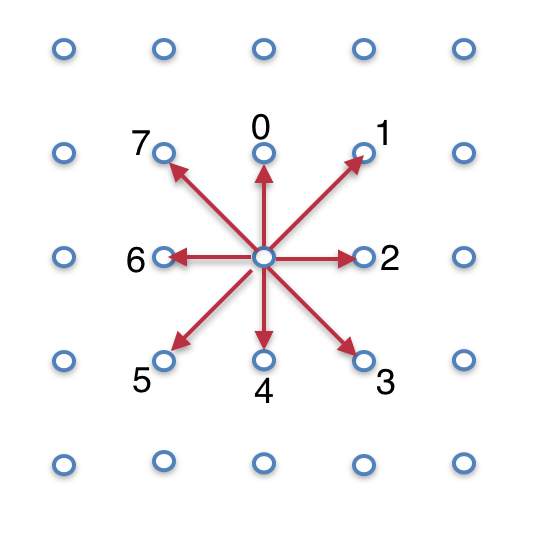

0일때는 위로 이동, 1일때는 오른쪽 위로 이동 2일때는 오른쪽으로 이동 ...

그림을 그릴 때, 사방이 막히면 방하나로 샙니다.
이동하는 방향이 담긴 배열 arrows가 매개변수로 주어질 때, 방의 갯수를 return 하도록 solution 함수를 작성하세요.

제한사항
배열 arrows의 크기는 1 이상 100,000 이하 입니다.
arrows의 원소는 0 이상 7 이하 입니다.
방은 다른 방으로 둘러 싸여질 수 있습니다.
입출력 예
arrows	return
[6, 6, 6, 4, 4, 4, 2, 2, 2, 0, 0, 0, 1, 6, 5, 5, 3, 6, 0]	3
입출력 예 설명
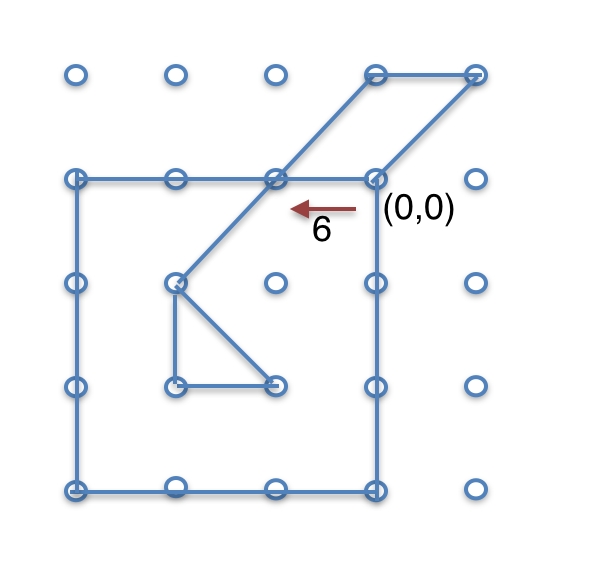

(0,0) 부터 시작해서 6(왼쪽) 으로 3번 이동합니다. 그 이후 주어진 arrows 를 따라 그립니다.
삼각형 (1), 큰 사각형(1), 평행사변형(1) = 3

In [ ]:
# 내가 쓴 코드 : 틀림
# 1. 교차를 까먹고 구현 안 함. -> 반칸으로 처리
# 2. seen 탐색의 복잡도가 매우 높아 timeout -> 간선을 따로 보관 후 set으로 탐색 처리
# 이론은 맞음
def solution(arrows):
    table = [(0,0)]
    arrow2num = {
        0:(0,1),
        1:(1,1),
        2:(1,0),
        3:(1,-1),
        4:(0,-1),
        5:(-1,-1),
        6:(-1,0),
        7:(-1,1)
    }
    for direction in arrows:
        new_node = (
            table[-1][0] + arrow2num[direction][0],
            table[-1][1] + arrow2num[direction][1]
        )
        table.append(new_node)
    
    count = 0
    seen = []
    prev = False
    for node in table:
        if node not in seen:
            seen.append(node)
            prev = False
        else:
            if not prev:
                count += 1
            else:
                candidates = []
                for i, x in enumerate(seen):
                    if x == prev:
                        if i>0:
                            candidates.append(seen[i-1])
                        if i<len(seen)-1:
                            candidates.append(seen[i+1])
                if node not in candidates:
                    count += 1
            prev = node
    return count

    
# 생각해야 할 것.
# 교점은 한 점에서 만나거나, 대각선까리 교차하거나. 이 두가지가 전부.
# 간 길을 다시 되돌아가는 것은 공간이 만들어지지 않는다.
# 한 점은 최대 8개의 공간에 관여할 수 있다.
# 연속적인 진행방향으로 방이 만들어지지 않더라도, 교점이나 교차로 인해 나중에 방이 생성될 수 있다.

# 추측 : 지나간 점을 다시 지나는 횟수가 방의 개수와 일치한다. 
# 단, 이미 갔던 길 (시작노드와 끝노드가 모두 같은)을 다시 지나간다면, 그 선들에 해당하는 "다시 지나가는 점"은 한개의 점으로 계산한다.
# 교차하게 된다면, 그것도 한개의 점으로 친다.


In [ ]:
# 새 간선을 통해 이미 방문한 정점으로 들어가는 순간 방(사이클)이 하나 생긴다.
def solution(arrows):
    # 8방향 이동 벡터
    dx = [0, 1, 1, 1, 0, -1, -1, -1]
    dy = [1, 1, 0, -1, -1, -1, 0, 1]

    # 방문한 정점(좌표)과 간선(무향)을 기록
    visited_nodes = set()
    visited_edges = set()

    x, y = 0, 0
    visited_nodes.add((x, y))

    rooms = 0

    for d in arrows:
        # 반칸씩 두 번 이동 (교차점을 정점으로 잡기 위함)
        for _ in range(2):
            nx, ny = x + dx[d], y + dy[d]

            # 무향 간선을 정규화하여 표현
            edge = (x, y, nx, ny) if (x, y) <= (nx, ny) else (nx, ny, x, y)

            # 이미 방문한 정점으로 '처음 그리는 간선'을 통해 들어오면 사이클 +1
            if (nx, ny) in visited_nodes and edge not in visited_edges:
                rooms += 1

            visited_nodes.add((nx, ny))
            visited_edges.add(edge)

            x, y = nx, ny

    return rooms


개발자를 희망하는 죠르디가 카카오에 면접을 보러 왔습니다.

코로나 바이러스 감염 예방을 위해 응시자들은 거리를 둬서 대기를 해야하는데 개발 직군 면접인 만큼
아래와 같은 규칙으로 대기실에 거리를 두고 앉도록 안내하고 있습니다.

대기실은 5개이며, 각 대기실은 5x5 크기입니다.
거리두기를 위하여 응시자들 끼리는 맨해튼 거리1가 2 이하로 앉지 말아 주세요.
단 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용합니다.
예를 들어,

PXP.png	PX_XP.png	PX_OP.png
위 그림처럼 자리 사이에 파티션이 존재한다면 맨해튼 거리가 2여도 거리두기를 지킨 것입니다.	위 그림처럼 파티션을 사이에 두고 앉은 경우도 거리두기를 지킨 것입니다.	위 그림처럼 자리 사이가 맨해튼 거리 2이고 사이에 빈 테이블이 있는 경우는 거리두기를 지키지 않은 것입니다.
P.png	O.png	X.png
응시자가 앉아있는 자리(P)를 의미합니다.	빈 테이블(O)을 의미합니다.	파티션(X)을 의미합니다.
5개의 대기실을 본 죠르디는 각 대기실에서 응시자들이 거리두기를 잘 기키고 있는지 알고 싶어졌습니다. 자리에 앉아있는 응시자들의 정보와 대기실 구조를 대기실별로 담은 2차원 문자열 배열 places가 매개변수로 주어집니다. 각 대기실별로 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0을 배열에 담아 return 하도록 solution 함수를 완성해 주세요.

제한사항
places의 행 길이(대기실 개수) = 5
places의 각 행은 하나의 대기실 구조를 나타냅니다.
places의 열 길이(대기실 세로 길이) = 5
places의 원소는 P,O,X로 이루어진 문자열입니다.
places 원소의 길이(대기실 가로 길이) = 5
P는 응시자가 앉아있는 자리를 의미합니다.
O는 빈 테이블을 의미합니다.
X는 파티션을 의미합니다.
입력으로 주어지는 5개 대기실의 크기는 모두 5x5 입니다.
return 값 형식
1차원 정수 배열에 5개의 원소를 담아서 return 합니다.
places에 담겨 있는 5개 대기실의 순서대로, 거리두기 준수 여부를 차례대로 배열에 담습니다.
각 대기실 별로 모든 응시자가 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0을 담습니다.
입출력 예
places	result
[["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]	[1, 0, 1, 1, 1]
입출력 예 설명
입출력 예 #1

첫 번째 대기실

No.	0	1	2	3	4
0	P	O	O	O	P
1	O	X	X	O	X
2	O	P	X	P	X
3	O	O	X	O	X
4	P	O	X	X	P
모든 응시자가 거리두기를 지키고 있습니다.
두 번째 대기실

No.	0	1	2	3	4
0	P	O	O	P	X
1	O	X	P	X	P
2	P	X	X	X	O
3	O	X	X	X	O
4	O	O	O	P	P
(0, 0) 자리의 응시자와 (2, 0) 자리의 응시자가 거리두기를 지키고 있지 않습니다.
(1, 2) 자리의 응시자와 (0, 3) 자리의 응시자가 거리두기를 지키고 있지 않습니다.
(4, 3) 자리의 응시자와 (4, 4) 자리의 응시자가 거리두기를 지키고 있지 않습니다.
세 번째 대기실

No.	0	1	2	3	4
0	P	X	O	P	X
1	O	X	O	X	P
2	O	X	P	O	X
3	O	X	X	O	P
4	P	X	P	O	X
모든 응시자가 거리두기를 지키고 있습니다.
네 번째 대기실

No.	0	1	2	3	4
0	O	O	O	X	X
1	X	O	O	O	X
2	O	O	O	X	X
3	O	X	O	O	X
4	O	O	O	O	O
대기실에 응시자가 없으므로 거리두기를 지키고 있습니다.
다섯 번째 대기실

No.	0	1	2	3	4
0	P	X	P	X	P
1	X	P	X	P	X
2	P	X	P	X	P
3	X	P	X	P	X
4	P	X	P	X	P
모든 응시자가 거리두기를 지키고 있습니다.
두 번째 대기실을 제외한 모든 대기실에서 거리두기가 지켜지고 있으므로, 배열 [1, 0, 1, 1, 1]을 return 합니다.

제한시간 안내
정확성 테스트 : 10초
※ 공지 - 2022년 4월 25일 테스트케이스가 추가되었습니다.

두 테이블 T1, T2가 행렬 (r1, c1), (r2, c2)에 각각 위치하고 있다면, T1, T2 사이의 맨해튼 거리는 |r1 - r2| + |c1 - c2| 입니다. ↩

In [ ]:
def solution(places):
    score = []
    for room in places:
        ok = True
        for i in range(5):
            for j in range(5):
                if room[i][j] != "P":
                    continue

                # 1) 거리 1 (오른쪽/아래만)
                if j < 4 and room[i][j+1] == "P":
                    ok = False; break
                if i < 4 and room[i+1][j] == "P":
                    ok = False; break

                # 2) 직선 거리 2: 가로/세로 P O P (중간이 O면 위반)
                if j < 3 and room[i][j+2] == "P" and room[i][j+1] == "O":
                    ok = False; break
                if i < 3 and room[i+2][j] == "P" and room[i+1][j] == "O":
                    ok = False; break

                # 3) 대각선 거리 2: 대각에 P가 있으면 둘 사이 두 칸이 모두 X여야만 안전
                if i < 4 and j < 4 and room[i+1][j+1] == "P":
                    if not (room[i+1][j] == "X" and room[i][j+1] == "X"):
                        ok = False; break
                if i < 4 and j > 0 and room[i+1][j-1] == "P":
                    if not (room[i+1][j] == "X" and room[i][j-1] == "X"):
                        ok = False; break

            if not ok:
                break
        score.append(1 if ok else 0)
    return score


In [41]:
solution([["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]])

[1, 0, 1, 1, 1]